In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data_with_stringency.csv')

In [3]:
data

,crime id,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency
0,fb5980f681cc55836191d8537790a1629eb264de22acdf...,2018-01,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Other theft,Investigation complete; no suspect identified,Camden,0.000
1,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Offender given community sentence,Camden,0.000
2,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,2018-01,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden,0.000
3,d43d952b5a96b62961bb4ae08460e50e5f572aa2ad639f...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden,0.000
4,17a702873711fba20a71fbd278e2ce486349f458ccd531...,2018-01,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,City of London,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2852854,d49d548c9127dbb79b0b153503bee9e3cbb12baf3135e8...,2021-09,Metropolitan Police Service,-2.738497,52.971779,On or near Sports/Recreation Area,W01000346,Wrexham 018B,Violence and sexual offences,Under investigation,Wrexham,42.034
2852855,960363b17f573705f1d1a7beaf88d722107e2584e78e97...,2021-09,Metropolitan Police Service,-0.763189,51.631391,On or near West End Road,E01017905,Wycombe 013C,Violence and sexual offences,Under investigation,Wycombe,42.034
2852856,5c9d5057d94a6565dbb61e0bd9eed82b44bb972b11ff30...,2021-09,Metropolitan Police Service,-0.719917,51.632384,On or near Baring Road,E01017901,Wycombe 014C,Violence and sexual offences,Under investigation,Wycombe,42.034
2852857,1f66e25fcfeae30f28f7d8a6635a86dc35818282dea24f...,2021-09,Metropolitan Police Service,-0.762112,51.575397,On or near Holland Road,E01017897,Wycombe 023C,Violence and sexual offences,Under investigation,Wycombe,42.034


In [4]:
data['crime type'].unique()

array(['Other theft', 'Burglary', 'Theft from the person',
       'Bicycle theft', 'Vehicle crime', 'Violence and sexual offences',
       'Robbery', 'Criminal damage and arson', 'Drugs', 'Public order',
       'Shoplifting', 'Possession of weapons', 'Other crime'],
      dtype=object)

In [13]:
data.dtypes

crime id                   object
month                      object
reported by                object
longitude                 float64
latitude                  float64
location                   object
lsoa code                  object
lsoa name                  object
crime type               category
last outcome category      object
borough_london             object
stringency                float64
dtype: object

In [12]:
data['crime type'] = data['crime type'].astype('category')

In [14]:
data_encoded = data[['crime type', 'stringency']].copy()

In [15]:
data_encoded

,crime type,stringency
0,Other theft,0.000
1,Burglary,0.000
2,Theft from the person,0.000
3,Theft from the person,0.000
4,Bicycle theft,0.000
...,...,...
2852854,Violence and sexual offences,42.034
2852855,Violence and sexual offences,42.034
2852856,Violence and sexual offences,42.034
2852857,Violence and sexual offences,42.034


In [41]:
y =  data_encoded['stringency']

In [29]:
X_encoded = pd.get_dummies(data_encoded['crime type'])

In [30]:
X_encoded

,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2852854,0,0,0,0,0,0,0,0,0,0,0,0,1
2852855,0,0,0,0,0,0,0,0,0,0,0,0,1
2852856,0,0,0,0,0,0,0,0,0,0,0,0,1
2852857,0,0,0,0,0,0,0,0,0,0,0,0,1


In [34]:
columns_encoded = X_encoded.columns.to_list()
columns_encoded

['Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences']

In [39]:
for value in columns_encoded:
    print(X_encoded[value].value_counts())

0    2774948
1      77911
Name: Bicycle theft, dtype: int64
0    2595712
1     257147
Name: Burglary, dtype: int64
0    2658192
1     194667
Name: Criminal damage and arson, dtype: int64
0    2696184
1     156675
Name: Drugs, dtype: int64
0    2818575
1      34284
Name: Other crime, dtype: int64
0    2472567
1     380292
Name: Other theft, dtype: int64
0    2833504
1      19355
Name: Possession of weapons, dtype: int64
0    2676454
1     176405
Name: Public order, dtype: int64
0    2748146
1     104713
Name: Robbery, dtype: int64
0    2709459
1     143400
Name: Shoplifting, dtype: int64
0    2703675
1     149184
Name: Theft from the person, dtype: int64
0    2447701
1     405158
Name: Vehicle crime, dtype: int64
0    2099191
1     753668
Name: Violence and sexual offences, dtype: int64


In [50]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [49]:
array_y = y.values
y.values

array([ 0.   ,  0.   ,  0.   , ..., 42.034, 42.034, 42.034])

In [48]:
array_X = X_encoded.values[:,0:len(X_encoded)]
array_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [74]:
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(array_X, array_y)

In [75]:
set_printoptions(precision=3)
print(fit.scores_)


[321.592 255.041  23.736 645.476  11.266 578.516  11.517 278.884 155.969
  69.233 420.923  66.132 501.333]


In [76]:
fit.pvalues_

array([0.000e+000, 0.000e+000, 1.896e-079, 0.000e+000, 2.772e-033,
       0.000e+000, 3.468e-034, 0.000e+000, 0.000e+000, 1.605e-253,
       0.000e+000, 1.455e-241, 0.000e+000])

In [87]:
# features = fit.transform(array_X)
# # summarize selected features
# print(features[0:14,:])

[[0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [1 0 0 0 0 0]]


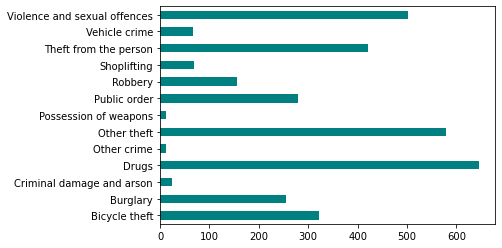

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline
feature_scores_plot = pd.Series(fit.scores_, columns_encoded)
feature_scores_plot.plot(kind = 'barh', color = 'teal')
plt.show()

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state=5) 